In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print(tf.version.VERSION)
print(tf.keras.__version__)

import os
import sys

import numpy as np

2.0.0
2.2.4-tf


In [27]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.PlotUtils import plot_history

In [9]:
import os, shutil
original_dataset_dir = 'c:/Users/michal/PycharmProjects/ml-playground/data/dogs-vs-cats'
original_dataset_dir_train = os.path.join(original_dataset_dir, 'train')

base_dir = 'c:/Users/michal/PycharmProjects/ml-playground/data/dogs-vs-cats/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)


train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
    
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
    
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
    
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [10]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    


In [12]:
print('total training cat pictures:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat pictures: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [14]:
# build network

from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [17]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [20]:
# Data preprocessing
# Using python generators

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255) ## rescales all images to [0, 1] interval
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')





Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
#for data_batch, labels_batch in train_generator:
#    print('data batch shape:', data_batch.shape)
#    print('labels batch shape:', labels_batch.shape)
#    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [22]:
#When using fit_generator, you can pass a validation_data argument, much as
#with the fit method. It’s important to note that this argument is allowed to be a data
#generator, but it could also be a tuple of Numpy arrays. If you pass a generator as
#validation_data, then this generator is expected to yield batches of validation data
#endlessly; thus you should also specify the validation_steps argument, which tells
#the process how many batches to draw from the validation generator for evaluation.

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/30
100/100 [==============================] - 55s 550ms/step - loss: 0.6902 - acc: 0.5215 - val_loss: 0.6846 - val_acc: 0.5270
Epoch 2/30
100/100 [==============================] - 53s 525ms/step - loss: 0.6600 - acc: 0.6135 - val_loss: 0.6435 - val_acc: 0.6270
Epoch 3/30
100/100 [==============================] - 52s 522ms/step - loss: 0.6144 - acc: 0.6625 - val_loss: 0.6118 - val_acc: 0.6690
Epoch 4/30
100/100 [==============================] - 52s 520ms/step - loss: 0.5753 - acc: 0.7015 - val_loss: 0.6357 - val_acc: 0.6240
Epoch 5/30
100/100 [==============================] - 54s 538ms/step - loss: 0.5469 - acc: 0.7265 - val_loss: 0.5944 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 53s 525ms/step - loss: 0.5191 - acc: 0.7385 - val_loss: 0.5737 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 52s 523ms/step - loss: 0.4861 - acc: 0.7590 - val_loss: 0.5791 - val_acc: 0.6910
Epoch 8/30
100/100 [==============================] - 5

In [29]:
model.save('cats_and_dogs_small_1.h5')

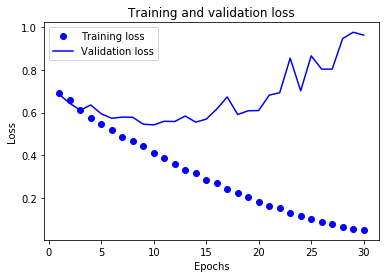

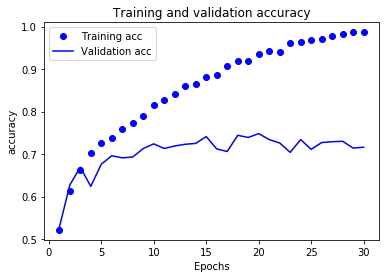

In [28]:
history_dict = history.history
#history_dict.keys()
#acc = history.history['acc']
#val_acc = history.history['val_acc']
#loss = history.history['loss']
#val_loss = history.history['val_loss']


plot_history(history_dict, what_to_plot=[('loss', 'Training loss'),('val_loss', 'Validation loss')], 
              title='Training and validation loss', xlabel='Epochs', ylabel='Loss')

plot_history(history_dict, what_to_plot=[('acc', 'Training acc'),('val_acc', 'Validation acc')], 
              title='Training and validation accuracy', xlabel='Epochs', ylabel='accuracy')



Classic Overfitting :
Training accuracy increases linearly and reaches nearly 100%, while validation accuracy stalls at 70-72%

In [ ]:
# Use data-augmentation

In [37]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


rotation_range is a value in degrees (0–180), a range within which to randomly
rotate pictures.

width_shift and height_shift are ranges (as a fraction of total width or
height) within which to randomly translate pictures vertically or horizontally.

shear_range is for randomly applying shearing transformations.

zoom_range is for randomly zooming inside pictures.

horizontal_flip is for randomly flipping half the images horizontally—relevant
when there are no assumptions of horizontal asymmetry (for example,
real-world pictures).

*fill_mode* is the strategy used for filling in newly created pixels, which can
appear after a rotation or a width/height shift.

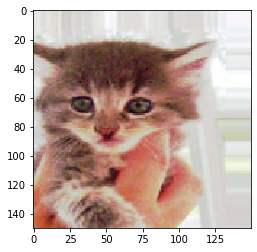

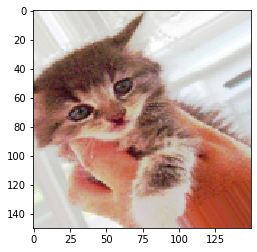

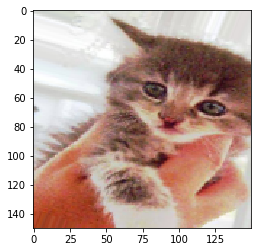

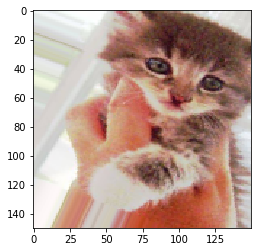

In [31]:
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))


x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [39]:
# Add Droupout to model

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [40]:
# train_datagen with additional data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
                                    
# no augmentation for validation data!
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

model.save('cats_and_dogs_small_2.h5')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 80s 800ms/step - loss: 0.6911 - acc: 0.5303 - val_loss: 0.6918 - val_acc: 0.4918
Epoch 2/100
100/100 [==============================] - 80s 797ms/step - loss: 0.6724 - acc: 0.5826 - val_loss: 0.6863 - val_acc: 0.5501
Epoch 3/100
100/100 [==============================] - 79s 790ms/step - loss: 0.6523 - acc: 0.6080 - val_loss: 0.6370 - val_acc: 0.6358
Epoch 4/100
100/100 [==============================] - 79s 792ms/step - loss: 0.6316 - acc: 0.6291 - val_loss: 0.6363 - val_acc: 0.6206
Epoch 5/100
100/100 [==============================] - 80s 803ms/step - loss: 0.6181 - acc: 0.6479 - val_loss: 0.6485 - val_acc: 0.6237
Epoch 6/100
100/100 [==============================] - 80s 797ms/step - loss: 0.6100 - acc: 0.6633 - val_loss: 0.5776 - val_acc: 0.6967
Epoch 7/100
100/100 [==============================] - 79s 791ms/step - loss: 0.5977 - acc: 0.6742 -

100/100 [==============================] - 80s 796ms/step - loss: 0.4061 - acc: 0.8116 - val_loss: 0.4540 - val_acc: 0.7970
Epoch 61/100
100/100 [==============================] - 79s 795ms/step - loss: 0.3997 - acc: 0.8163 - val_loss: 0.4145 - val_acc: 0.8135
Epoch 62/100
100/100 [==============================] - 80s 795ms/step - loss: 0.3980 - acc: 0.8169 - val_loss: 0.4717 - val_acc: 0.7976
Epoch 63/100
100/100 [==============================] - 80s 796ms/step - loss: 0.3970 - acc: 0.8201 - val_loss: 0.5579 - val_acc: 0.7747
Epoch 64/100
100/100 [==============================] - 81s 807ms/step - loss: 0.3969 - acc: 0.8201 - val_loss: 0.4583 - val_acc: 0.7951
Epoch 65/100
100/100 [==============================] - 81s 805ms/step - loss: 0.3892 - acc: 0.8216 - val_loss: 0.4839 - val_acc: 0.8077
Epoch 66/100
100/100 [==============================] - 79s 795ms/step - loss: 0.3940 - acc: 0.8207 - val_loss: 0.4522 - val_acc: 0.8039
Epoch 67/100
100/100 [==============================] 

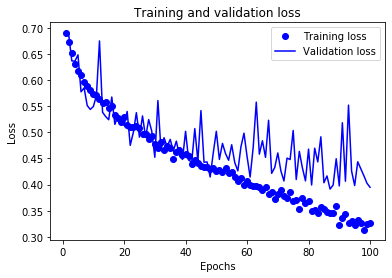

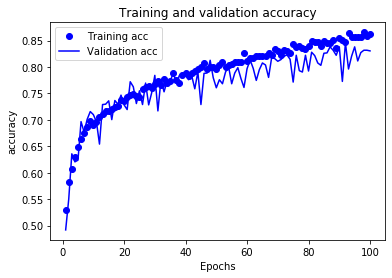

In [41]:
history_dict = history.history
#history_dict.keys()
#acc = history.history['acc']
#val_acc = history.history['val_acc']
#loss = history.history['loss']
#val_loss = history.history['val_loss']


plot_history(history_dict, what_to_plot=[('loss', 'Training loss'),('val_loss', 'Validation loss')], 
              title='Training and validation loss', xlabel='Epochs', ylabel='Loss')

plot_history(history_dict, what_to_plot=[('acc', 'Training acc'),('val_acc', 'Validation acc')], 
              title='Training and validation accuracy', xlabel='Epochs', ylabel='accuracy')